In [1]:
!pip install networkx

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [17]:
import networkx as nx
from queue import Queue

In [18]:
import numba
import time
from queue import Queue
from tqdm import tqdm

def calculate_betweenness(G):
    
    CB = dict.fromkeys(G, 0.0)   # 用于存储节点的Betweenness Centrality
    
    for s in tqdm(G.nodes()):
        PreNode = {w : [] for w in G.nodes()}  # 用于存储每个节点的前置节点
        dist = dict.fromkeys(G, None)          # 用于存储从s出发到一个节点的距离
        sigma = dict.fromkeys(G, 0.0)          # 用于存储从s出发到一个节点的最短路径个
        delta = dict.fromkeys(G, 0.0)          

        sigma[s] = 1  # 起始节点的sigma(s)为1
        dist[s] = 0   # 起始节点到自己的路径长度为0

        S = []        # 用于优先的遍历顺序，因为后面需要根据遍历顺序反向逐步计算delta
        Q = Queue()   # 用于宽度有限搜索
        Q.put(s)      # 将初始节点放入队列中

        while not Q.empty():
            v = Q.get()                         # 从队列中取出一个节点
            S.append(v)                         # 将其保存在遍历顺序记录数组中

            for w in G.neighbors(v):           
                if dist[w] is None:             # 如果该节点的dist为None, 那么说明它是第一次被访问
                    Q.put(w)                    #   此时将其放入遍历队列
                    dist[w] = dist[v] + 1       #   同时将其dist置为前一个节点的dist+1

                if dist[w] == dist[v] + 1:      # 如果上一个在这个节点的最短路径上
                    sigma[w] += sigma[v]        #   这个节点的sigma加上上个节点的sigma
                    PreNode[w].append(v)        #   同时将上个节点记录到这个节点的前置节点列表中
        
        for w in S[::-1]:                       # 对记录反序遍历
            for v in PreNode[w]:                # 从后往前计算delta
                delta[v] += sigma[v] / sigma[w] * (1 + delta[w])

            if w != s:
                CB[w] += delta[w]

    for v in CB:      # 因为从s到t 和 t到s计算了两次，因此Betweenness需要除以2
        CB[v] /= 2.0
        
    return CB

In [24]:
def test(num_nodes, num_edges_per_node):
    G = nx.random_graphs.gnm_random_graph(num_nodes, num_edges_per_node)
    
    time_start = time.time()     # 开始计时
    BC = calculate_betweenness(G)
    time_end = time.time()       # 结束计时

    time_cost = time_end - time_start
    return time_cost

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

time_cost_list = []

# 边不变，节点变化
num_nodes = 1000
num_edges_list = range(5, 201, 5)

for num_edges_per_node in num_edges_list:
    time_cost = test(num_nodes, num_edges_per_node)
    time_cost_list.append(time_cost)

100%|██████████| 1000/1000 [00:00<00:00, 1548.81it/s]


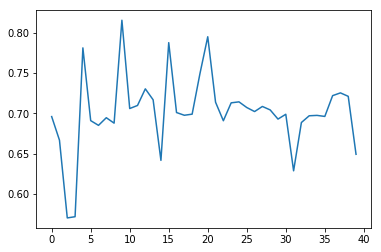

In [27]:
plt.plot(time_cost_list)

100%|██████████| 1000/1000 [00:25<00:00, 40.39it/s]


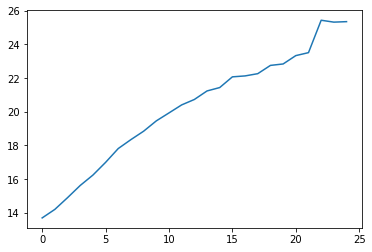

In [8]:
num_nodes = 1000
num_edges_list = range(20, 30)

for num_edges_per_node in num_edges_list:
    time_cost = test(num_nodes, num_edges_per_node)
    time_cost_list.append(time_cost)

plt.plot(time_cost_list)

In [10]:
num_edges_per_node = 100
time_cost = test(num_nodes, num_edges_per_node)
print(time_cost)

100%|██████████| 1000/1000 [01:02<00:00, 17.02it/s]

62.13469982147217


In [11]:
num_edges_per_node = 200
time_cost = test(num_nodes, num_edges_per_node)
print(time_cost)

100%|██████████| 1000/1000 [01:55<00:00,  9.54it/s]

115.69800853729248


In [12]:
G = nx.random_graphs.barabasi_albert_graph(10, 2)

{0: 1.9,
 1: 2.7333333333333334,
 2: 16.6,
 3: 7.533333333333333,
 4: 4.866666666666667,
 5: 0.5,
 6: 2.7333333333333334,
 7: 0.5,
 8: 2.6333333333333333,
 9: 0.0}